In [1]:
# Import all the necessary packages and libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
# Read the '.csv' file
data = pd.read_csv('Subjects 2019-20.csv') 

# View the head of the df
data.head() 

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370
4,01 Medicine and dentistry,All,All,Full-time,All,Female,2019/20,36470


In [3]:
# More info about the DataFrame
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29248 entries, 0 to 29247
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CAH level 1             29248 non-null  object
 1   First year marker       29248 non-null  object
 2   Level of study          29248 non-null  object
 3   Mode of study           29248 non-null  object
 4   Country of HE provider  29248 non-null  object
 5   Sex                     29248 non-null  object
 6   Academic Year           29248 non-null  object
 7   Number                  29248 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


In [4]:
# Prints descriptive statistics
data.describe()  

,Number
count,2.924800e+04
mean,1.221028e+04
std,6.953204e+04
min,0.000000e+00
25%,1.500000e+01
50%,2.500000e+02
75%,2.635000e+03
max,2.532385e+06


In [5]:
# Check for missing data
data.isnull().sum()

CAH level 1               0
First year marker         0
Level of study            0
Mode of study             0
Country of HE provider    0
Sex                       0
Academic Year             0
Number                    0
dtype: int64

In [6]:
# Check for NaN
datana = data[(data["Number"]=="NaN")]

In [7]:
# Print df with check for NaN
datana

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number


In [8]:
# Looked at all of data, just data.head(100) left here to decrease file size
data.head(100)

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370
4,01 Medicine and dentistry,All,All,Full-time,All,Female,2019/20,36470
...,...,...,...,...,...,...,...,...
95,01 Medicine and dentistry,First year,All,Part-time,Northern Ireland,Total,2019/20,95
96,01 Medicine and dentistry,First year,All,All,Scotland,Female,2019/20,1730
97,01 Medicine and dentistry,First year,All,All,Scotland,Male,2019/20,900
98,01 Medicine and dentistry,First year,All,All,Scotland,Other,2019/20,40


In [9]:
# Check the distribution of the df
# Minimum values of the df
data.min()

CAH level 1               01 Medicine and dentistry
First year marker                               All
Level of study                                  All
Mode of study                                   All
Country of HE provider                          All
Sex                                          Female
Academic Year                               2019/20
Number                                            0
dtype: object

In [10]:
# Maximum values of the df
data.max()

CAH level 1               Total science CAH level 1
First year marker                       Other years
Level of study                Postgraduate (taught)
Mode of study                             Part-time
Country of HE provider                        Wales
Sex                                           Total
Academic Year                               2019/20
Number                                      2532385
dtype: object

In [11]:
# Check for number of variables in each column
data.nunique()

CAH level 1                 24
First year marker            3
Level of study               7
Mode of study                3
Country of HE provider       5
Sex                          4
Academic Year                1
Number                    5112
dtype: int64

In [12]:
# Pandas drop a column with drop function
data1 = data.drop(['Academic Year'], axis=1)

In [13]:
# Rename columns
data1.columns = ['Area', 'Year', 'Level', 'Mode', 'Country', 'Sex', 'Number']

In [14]:
# Check df
data1.head()

,Area,Year,Level,Mode,Country,Sex,Number
0,01 Medicine and dentistry,All,All,All,All,Female,42610
1,01 Medicine and dentistry,All,All,All,All,Male,27605
2,01 Medicine and dentistry,All,All,All,All,Other,150
3,01 Medicine and dentistry,All,All,All,All,Total,70370
4,01 Medicine and dentistry,All,All,Full-time,All,Female,36470


In [15]:
# Pivot the df
subjects = ['Area', 'Year', 'Level', 'Mode','Country']

new_df = data1.set_index(['Sex'] + subjects).unstack('Sex')
new_df.head(10)

Number         \
Sex                                                             Female   Male   
Area                      Year Level Mode      Country                          
01 Medicine and dentistry All  All   All       All               42610  27605   
                                               England           33855  22595   
                                               Northern Ireland   1310    780   
                                               Scotland           5115   3020   
                                               Wales              2325   1210   
                                     Full-time All               36470  23745   
                                               England           28865  19350   
                                               Northern Ireland   1230    700   
                                               Scotland           4505   2675   
                                               Wales              1875   1020   

                                                                              
Sex                                                             Other  Total  
Area                      Year Level Mode      Country                        
01 Medicine and dentistry All  All   All       All                150  70370  
                                               England            105  56560  
                                               Northern Ireland     0   2090  
                                               Scotland            50   8185  
                                               Wales                0   3540  
                                     Full-time All                100  60315  
                                               England             65  48275  
                                               Northern Ireland     0   1930  
                                               Scotland            35   7215  
                                               Wales                0   2895

In [16]:
# Reset index
df1 = new_df.Number.rename_axis([None], axis=1).reset_index()

In [17]:
# Check new df
df1.head()

,Area,Year,Level,Mode,Country,Female,Male,Other,Total
0,01 Medicine and dentistry,All,All,All,All,42610,27605,150,70370
1,01 Medicine and dentistry,All,All,All,England,33855,22595,105,56560
2,01 Medicine and dentistry,All,All,All,Northern Ireland,1310,780,0,2090
3,01 Medicine and dentistry,All,All,All,Scotland,5115,3020,50,8185
4,01 Medicine and dentistry,All,All,All,Wales,2325,1210,0,3540


In [18]:
# Create new columns of percentages for number by sex
df1['Female %'] = (df1['Female']/df1['Total']*100).round(2)
df1['Male %'] = (df1['Male']/df1['Total']*100).round(2)
df1['Other %'] = (df1['Other']/df1['Total']*100).round(2)

In [19]:
# Check new df
df1.head(3)

,Area,Year,Level,Mode,Country,Female,Male,Other,Total,Female %,Male %,Other %
0,01 Medicine and dentistry,All,All,All,All,42610,27605,150,70370,60.55,39.23,0.21
1,01 Medicine and dentistry,All,All,All,England,33855,22595,105,56560,59.86,39.95,0.19
2,01 Medicine and dentistry,All,All,All,Northern Ireland,1310,780,0,2090,62.68,37.32,0.00


In [20]:
# Create new df with just first year students
first_year = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [21]:
# Check df
first_year

,Area,Year,Level,Mode,Country,Female,Male,Other,Total,Female %,Male %,Other %
101,01 Medicine and dentistry,First year,All,All,All,14070,7865,75,22015,63.91,35.73,0.34
402,02 Subjects allied to medicine,First year,All,All,All,107740,27930,185,135850,79.31,20.56,0.14
716,03 Biological and sport sciences,First year,All,All,All,21415,22145,60,43620,49.09,50.77,0.14
1029,04 Psychology,First year,All,All,All,41360,9780,160,51295,80.63,19.07,0.31
1317,05 Veterinary sciences,First year,All,All,All,2460,525,5,2990,82.27,17.56,0.17
1570,07 Physical sciences,First year,All,All,All,10200,13795,35,24025,42.46,57.42,0.15
1872,08 General and others in sciences,First year,All,All,All,1655,1410,5,3070,53.91,45.93,0.16
2162,09 Mathematical sciences,First year,All,All,All,6815,10605,35,17460,39.03,60.74,0.20
2472,10 Engineering and technology,First year,All,All,All,14485,54795,50,69330,20.89,79.04,0.07
2786,11 Computing,First year,All,All,All,12850,45425,105,58385,22.01,77.80,0.18


In [22]:
# Filter df again
subset = first_year.iloc[:, [0,9,10,11]]

In [23]:
# Reorder rows
year1 = subset.sort_values(by='Female %')

In [24]:
# Check new df
year1

,Area,Female %,Male %,Other %
2472,10 Engineering and technology,20.89,79.04,0.07
2786,11 Computing,22.01,77.80,0.18
2162,09 Mathematical sciences,39.03,60.74,0.20
1570,07 Physical sciences,42.46,57.42,0.15
4619,17 Business and management,48.73,51.22,0.05
716,03 Biological and sport sciences,49.09,50.77,0.14
7102,Total science CAH level 1,53.82,46.03,0.15
1872,08 General and others in sciences,53.91,45.93,0.16
3099,12 Geographical and environmental studies (nat...,56.11,43.78,0.06
6472,Total,57.86,41.94,0.20


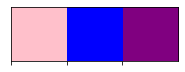

In [25]:
# Set colour palette for seaborn
color = ["pink", "blue", "purple"]
sns.set_palette(color)
sns.palplot(sns.color_palette())

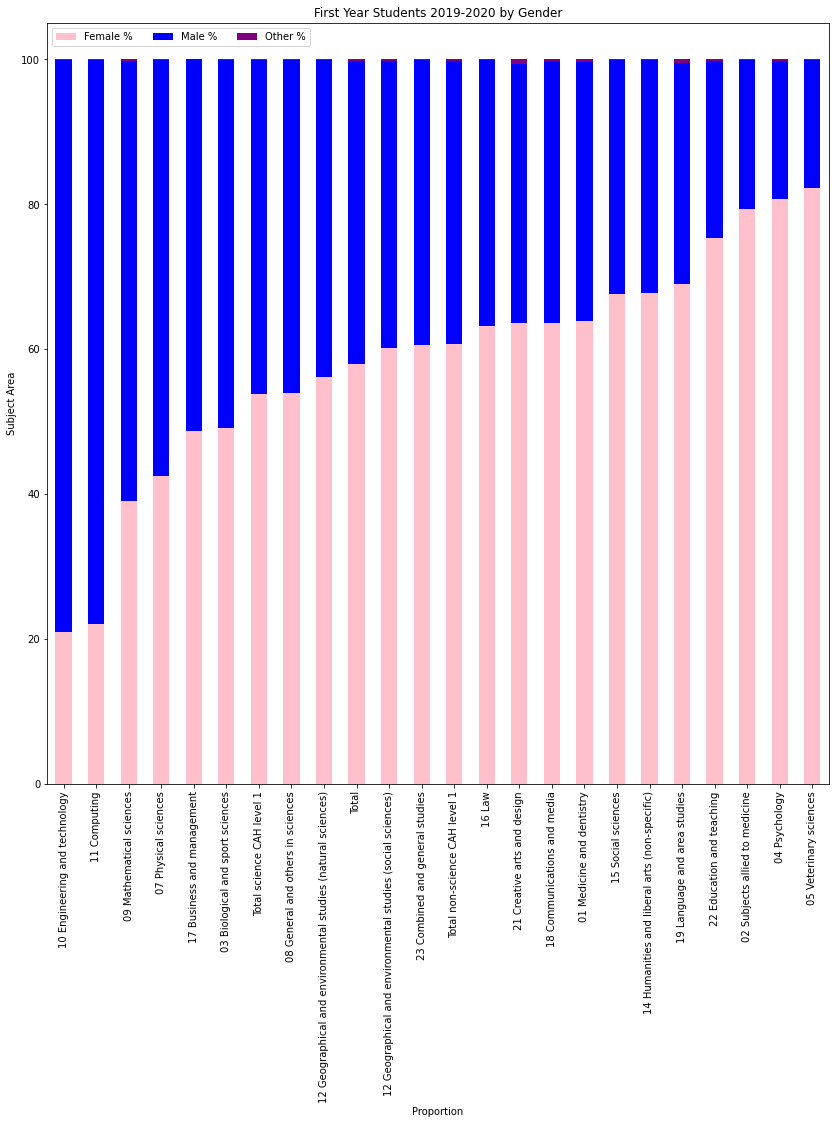

In [26]:
# Plot First Year Percentage by Gender 
year1.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [27]:
# Filter df again
subset2 = first_year.iloc[:, [0,5,6,7]]

In [28]:
# Reorder rows
year2 = subset2.sort_values(by='Female')

In [29]:
# Check new df
year2

,Area,Female,Male,Other
1872,08 General and others in sciences,1655,1410,5
1317,05 Veterinary sciences,2460,525,5
3703,14 Humanities and liberal arts (non-specific),2520,1195,5
3409,12 Geographical and environmental studies (soc...,2825,1865,10
3099,12 Geographical and environmental studies (nat...,4960,3870,5
2162,09 Mathematical sciences,6815,10605,35
1570,07 Physical sciences,10200,13795,35
6173,23 Combined and general studies,11755,7660,25
2786,11 Computing,12850,45425,105
4931,18 Communications and media,13620,7755,40


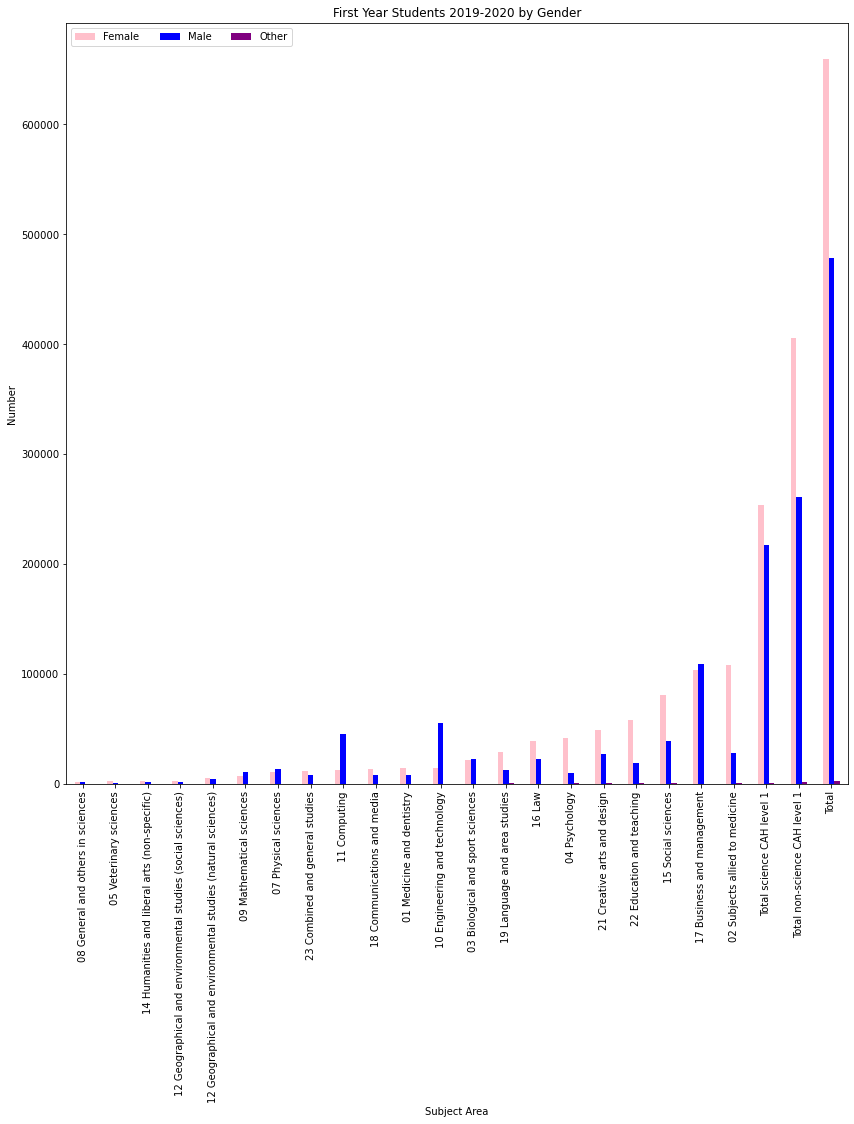

In [30]:
# Plot First Year Number by Gender 
year2.plot(kind='bar', x='Area',
                    stacked=False,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students 2019-2020 by Gender")
plt.xlabel("Subject Area")
plt.xticks(rotation = 90)
plt.ylabel("Number")
plt.show()

In [31]:
# Create new df with all student years
all_years = df1[(df1["Year"]=="All")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [32]:
# Filter df again
subset = all_years.iloc[:, [0,9,10,11]]

In [33]:
# Reorder rows
allyears = subset.sort_values(by='Female %')

In [34]:
# Check new df
allyears

,Area,Female %,Male %,Other %
2367,10 Engineering and technology,19.74,80.18,0.08
2682,11 Computing,19.92,79.92,0.16
2058,09 Mathematical sciences,37.19,62.66,0.15
1465,07 Physical sciences,40.46,59.41,0.13
4514,17 Business and management,48.30,51.66,0.04
611,03 Biological and sport sciences,49.06,50.83,0.11
6997,Total science CAH level 1,52.17,47.71,0.12
1777,08 General and others in sciences,52.44,47.48,0.08
2994,12 Geographical and environmental studies (nat...,55.14,44.77,0.09
6367,Total,56.90,42.95,0.15


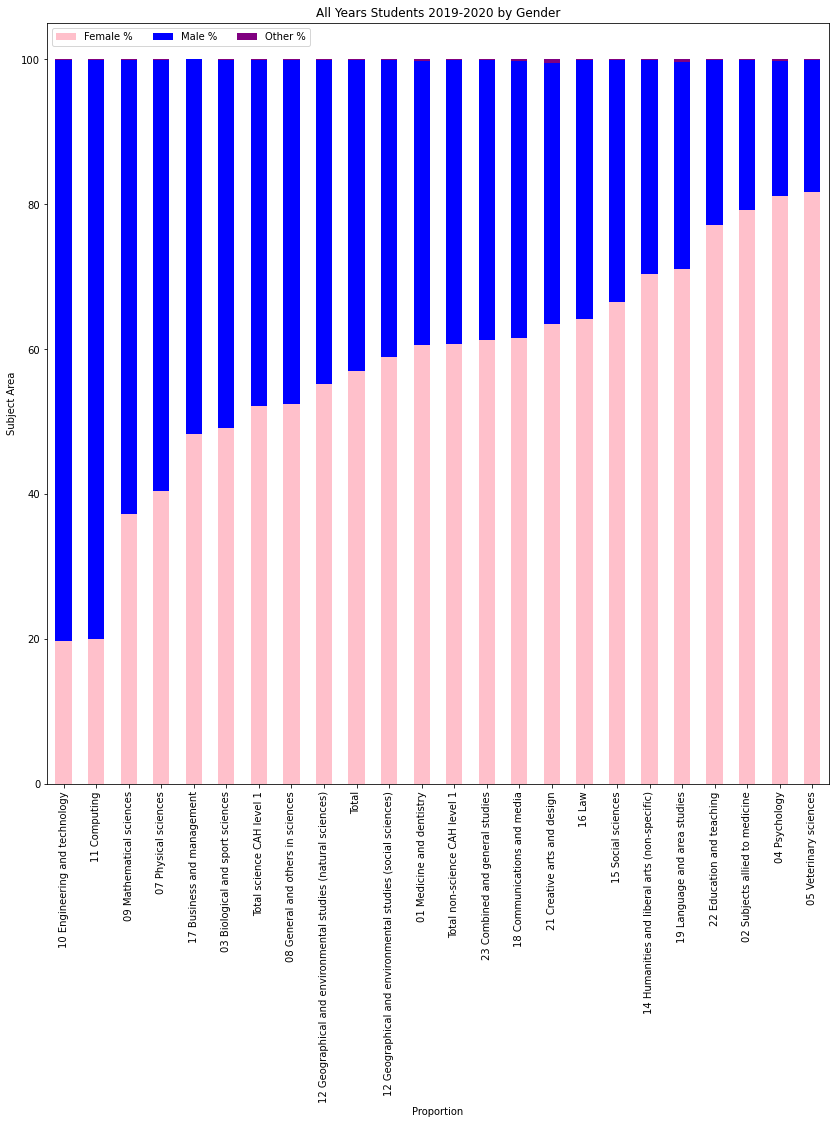

In [35]:
# Plot First Year Percentage by Gender 
allyears.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("All Years Students 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [36]:
# Create new df with first year students, undergraduates
undergrad = df1[(df1["Year"]=="First year")&(df1["Level"]=="All undergraduate")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [37]:
# Filter df again
subset = undergrad.iloc[:, [0,9,10,11]]

In [38]:
# Reorder rows
first_undergrad = subset.sort_values(by='Female %')

In [39]:
# Check new df
first_undergrad

,Area,Female %,Male %,Other %
2816,11 Computing,17.54,82.33,0.15
2502,10 Engineering and technology,17.64,82.28,0.07
2192,09 Mathematical sciences,37.09,62.74,0.13
1600,07 Physical sciences,42.53,57.34,0.12
4649,17 Business and management,45.96,54.01,0.02
746,03 Biological and sport sciences,47.25,52.66,0.09
7132,Total science CAH level 1,53.18,46.72,0.10
1901,08 General and others in sciences,53.95,46.05,0.00
3129,12 Geographical and environmental studies (nat...,55.89,44.11,0.00
6502,Total,56.96,42.87,0.17


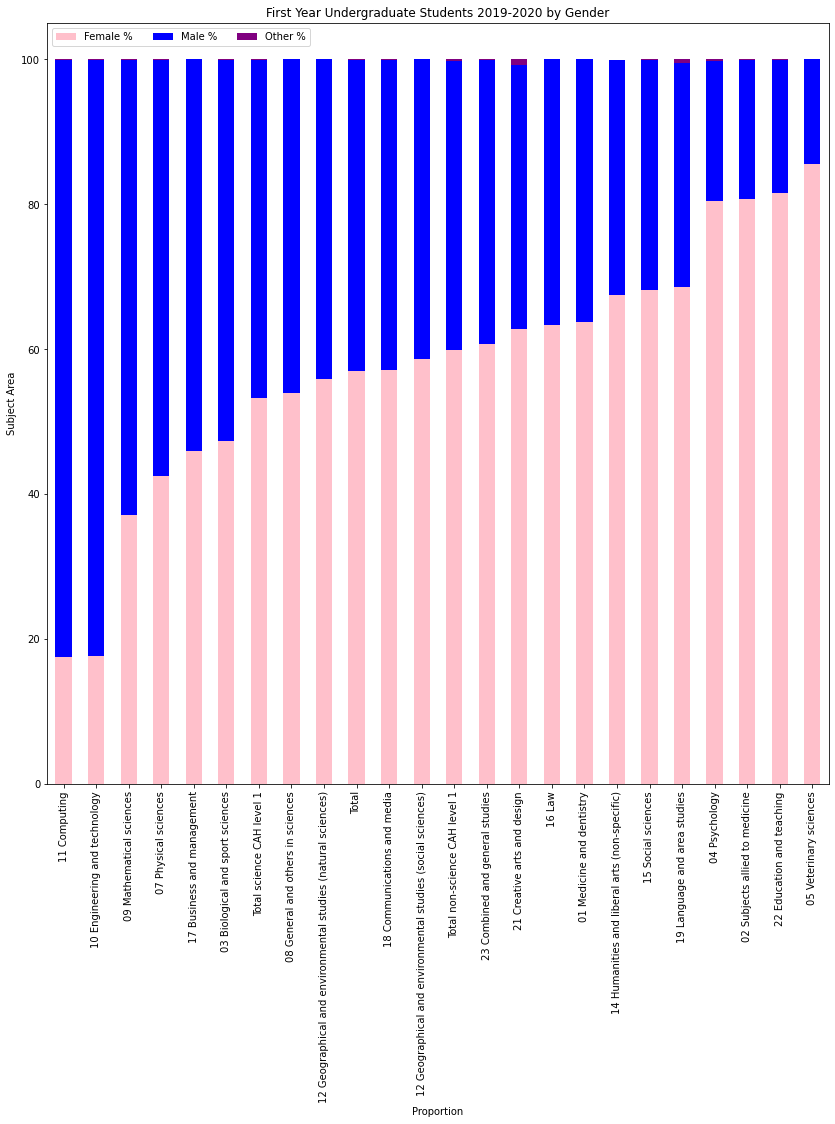

In [40]:
# Plot First Year Percentage by Gender 
first_undergrad.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Undergraduate Students 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [41]:
# Create new df with first year students, postgraduates
postgrad = df1[(df1["Year"]=="First year")&(df1["Level"]=="All postgraduate")
                     &(df1["Mode"]=="All")&(df1["Country"]=="All")]

In [42]:
# Filter df again
subset = postgrad.iloc[:, [0,9,10,11]]

In [43]:
# Reorder rows
first_postgrad = subset.sort_values(by='Female %')

In [44]:
# Check new df
first_postgrad

,Area,Female %,Male %,Other %
2487,10 Engineering and technology,26.65,73.29,0.08
2801,11 Computing,29.97,69.79,0.24
1585,07 Physical sciences,42.25,57.55,0.20
2177,09 Mathematical sciences,42.89,56.76,0.26
4634,17 Business and management,52.42,47.48,0.10
1887,08 General and others in sciences,53.33,46.67,0.00
731,03 Biological and sport sciences,54.93,44.78,0.29
7117,Total science CAH level 1,55.07,44.67,0.26
3114,12 Geographical and environmental studies (nat...,56.76,43.06,0.18
6487,Total,59.41,40.34,0.25


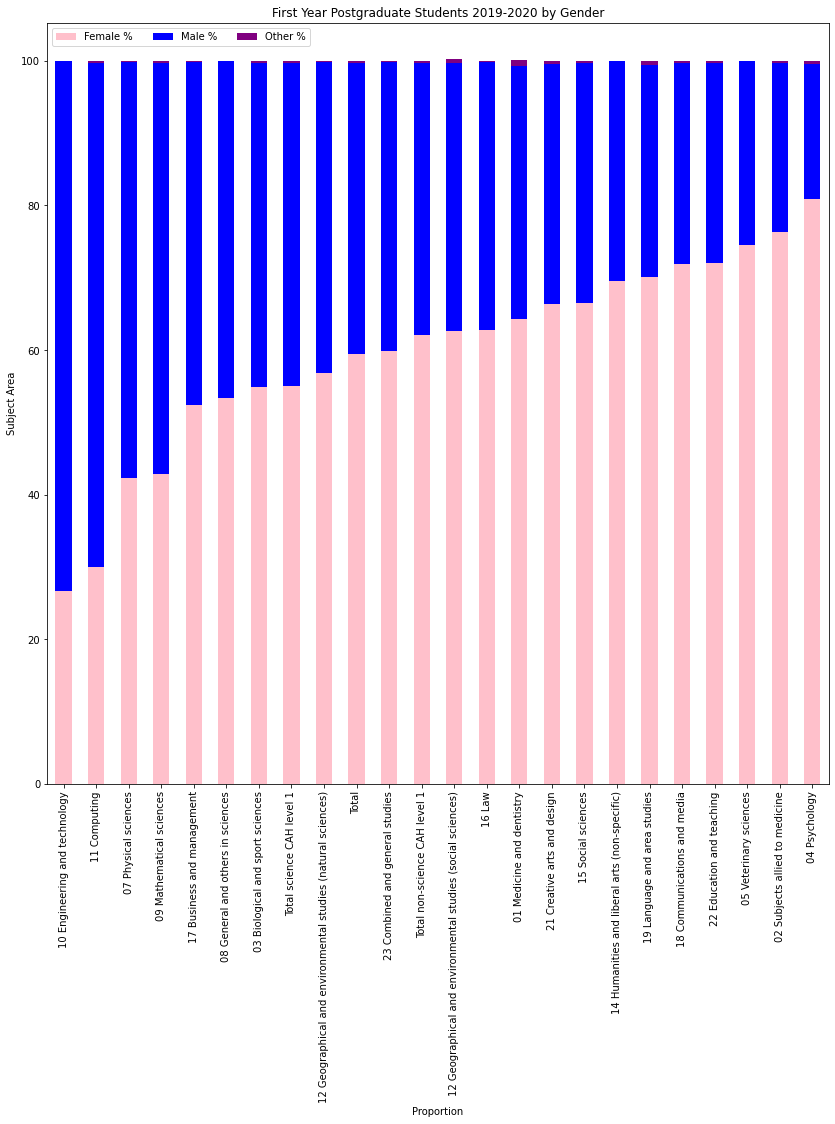

In [45]:
# Plot First Year Percentage by Gender 
first_postgrad.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Postgraduate Students 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [46]:
# Create new df with first year students, undergrad and postgrad, full time
full = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="Full-time")&(df1["Country"]=="All")]

In [47]:
# Filter df again
subset = full.iloc[:, [0,9,10,11]]

In [48]:
# Reorder rows
first_full = subset.sort_values(by='Female %')

In [49]:
# Check new df
first_full

,Area,Female %,Male %,Other %
2791,11 Computing,21.15,78.67,0.18
2477,10 Engineering and technology,21.68,78.26,0.06
2167,09 Mathematical sciences,39.09,60.72,0.19
1575,07 Physical sciences,42.38,57.48,0.13
4624,17 Business and management,48.65,51.30,0.05
721,03 Biological and sport sciences,49.09,50.78,0.13
7107,Total science CAH level 1,50.99,48.88,0.13
1877,08 General and others in sciences,53.78,46.22,0.00
3104,12 Geographical and environmental studies (nat...,56.02,43.91,0.07
6477,Total,56.35,43.51,0.13


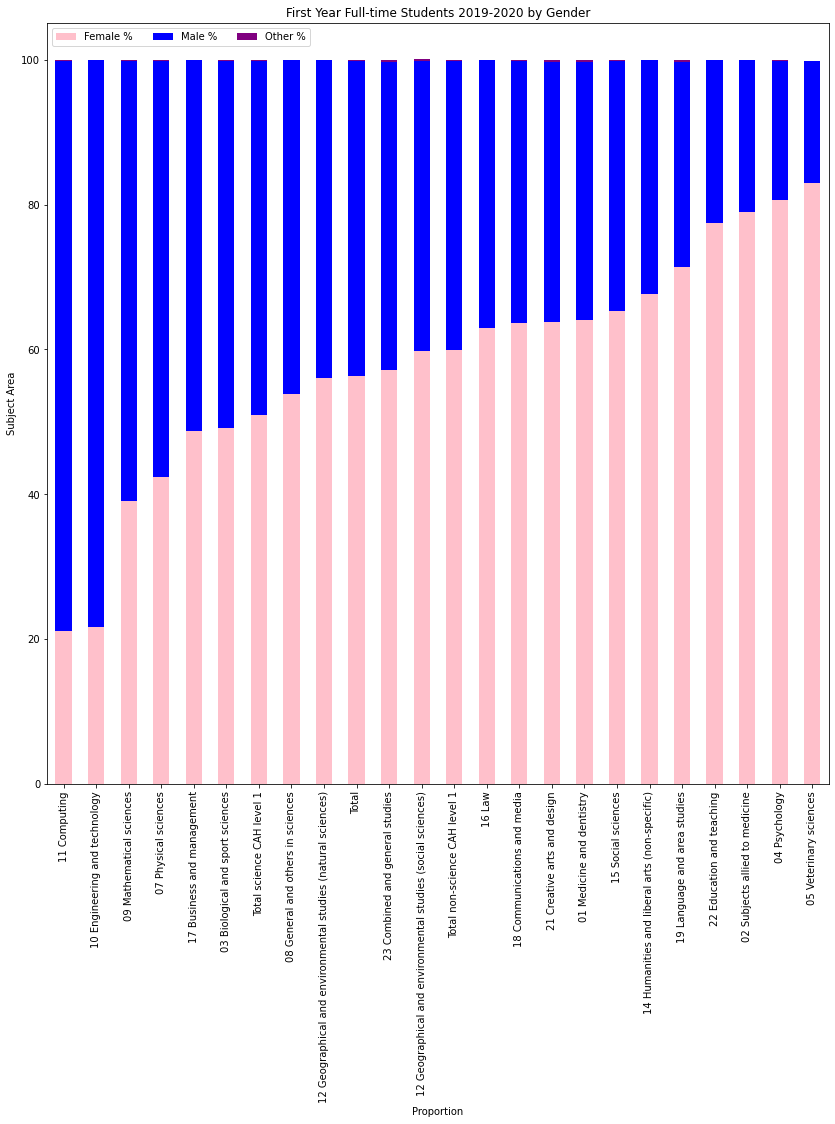

In [50]:
# Plot First Year Percentage of Gender
first_full.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Full-time Students 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [51]:
# Create new df with first year students, undergrad and postgrad, part time
part = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="Part-time")&(df1["Country"]=="All")]

In [52]:
# Filter df again
subset = part.iloc[:, [0,9,10,11]]

In [53]:
# Reorder rows
first_part = subset.sort_values(by='Female %')

In [54]:
# Check new df
first_part

,Area,Female %,Male %,Other %
2482,10 Engineering and technology,16.37,83.49,0.15
2796,11 Computing,26.99,72.83,0.17
2172,09 Mathematical sciences,38.83,60.90,0.00
1580,07 Physical sciences,43.38,56.29,0.33
726,03 Biological and sport sciences,49.18,50.57,0.25
4629,17 Business and management,49.26,50.65,0.09
1882,08 General and others in sciences,54.47,45.53,0.00
3109,12 Geographical and environmental studies (nat...,56.52,43.17,0.00
5562,21 Creative arts and design,60.12,33.53,6.34
6183,23 Combined and general studies,61.01,38.87,0.09


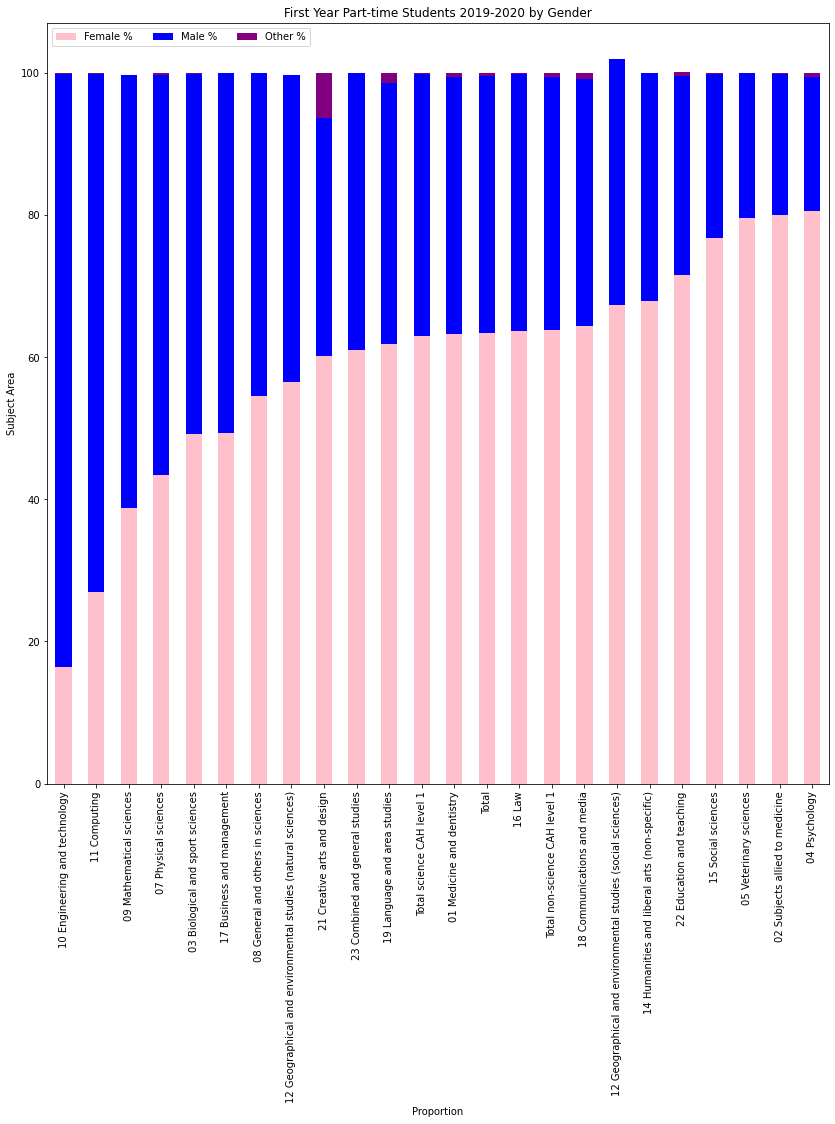

In [55]:
# Plot First Year Percentage of Male, Female, Other 
first_part.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Part-time Students 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [56]:
# Create new df with just first year students for England
eng = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="England")]

In [57]:
# Filter df again
subset = eng.iloc[:, [0,9,10,11]]

In [58]:
# Reorder rows
first_eng = subset.sort_values(by='Female %')

In [59]:
# Check new df
first_eng

,Area,Female %,Male %,Other %
2473,10 Engineering and technology,20.83,79.11,0.06
2787,11 Computing,21.79,78.07,0.14
2163,09 Mathematical sciences,38.02,61.77,0.17
1571,07 Physical sciences,41.93,57.94,0.13
4620,17 Business and management,48.24,51.71,0.05
717,03 Biological and sport sciences,48.64,51.26,0.12
1873,08 General and others in sciences,52.95,46.82,0.00
7103,Total science CAH level 1,53.37,46.50,0.13
3100,12 Geographical and environmental studies (nat...,56.29,43.71,0.07
6473,Total,57.55,42.29,0.17


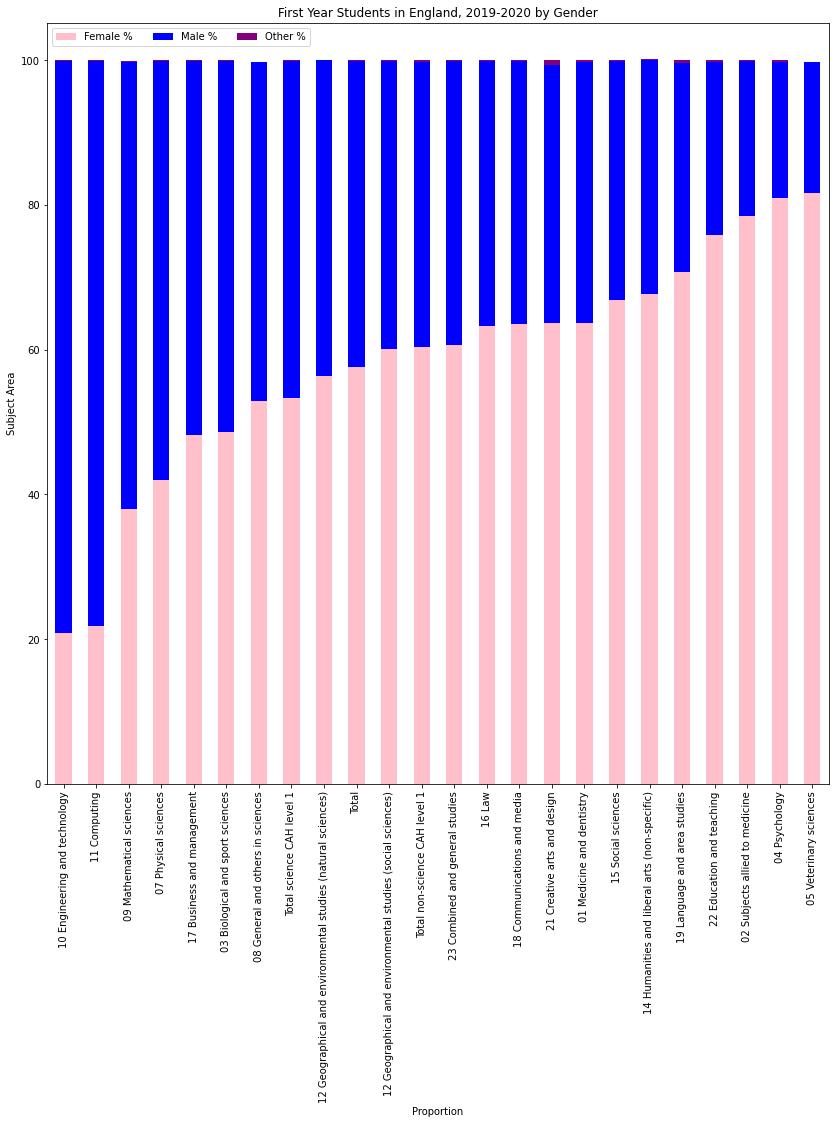

In [60]:
# Plot First Year Percentage of Male, Female, Other 
first_eng.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in England, 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [61]:
# Create new df with just first year students for Scotland
scot = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="Scotland")]

In [62]:
# Filter df again
subset = scot.iloc[:, [0,9,10,11]]

In [63]:
# Reorder rows
first_scot = subset.sort_values(by='Female %')

In [64]:
# Check new df
first_scot

,Area,Female %,Male %,Other %
2475,10 Engineering and technology,22.96,76.84,0.20
2789,11 Computing,24.72,74.83,0.45
1573,07 Physical sciences,44.96,54.85,0.19
2165,09 Mathematical sciences,46.23,53.28,0.24
4622,17 Business and management,54.28,45.52,0.18
7105,Total science CAH level 1,55.65,43.95,0.40
719,03 Biological and sport sciences,57.07,42.50,0.33
1875,08 General and others in sciences,57.59,42.41,0.00
3102,12 Geographical and environmental studies (nat...,57.66,42.34,0.45
6475,Total,60.14,39.30,0.55


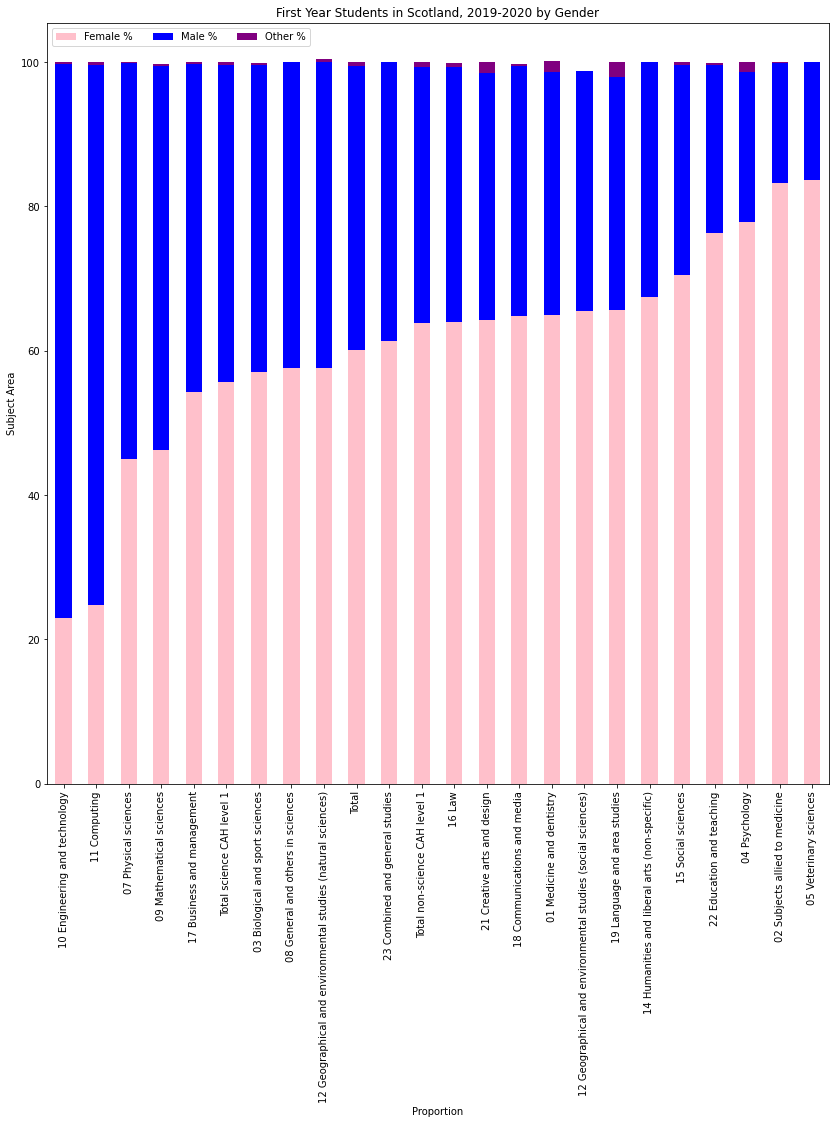

In [65]:
# Plot First Year Percentage of Male, Female, Other 
first_scot.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in Scotland, 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [66]:
# Create new df with just first year students for Wales
wales = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="Wales")]

In [67]:
# Filter df again
subset = wales.iloc[:, [0,9,10,11]]

In [68]:
# Reorder rows
first_wales = subset.sort_values(by='Female %')

In [69]:
# Check new df
first_wales

,Area,Female %,Male %,Other %
2476,10 Engineering and technology,17.05,82.82,0.00
2790,11 Computing,18.09,81.62,0.29
1876,08 General and others in sciences,38.46,53.85,0.00
2166,09 Mathematical sciences,40.00,60.00,0.00
720,03 Biological and sport sciences,44.09,55.91,0.13
1574,07 Physical sciences,45.71,53.93,0.36
4623,17 Business and management,47.53,52.43,0.00
3103,12 Geographical and environmental studies (nat...,50.00,50.00,0.00
7106,Total science CAH level 1,52.13,47.76,0.11
3413,12 Geographical and environmental studies (soc...,54.72,45.28,0.00


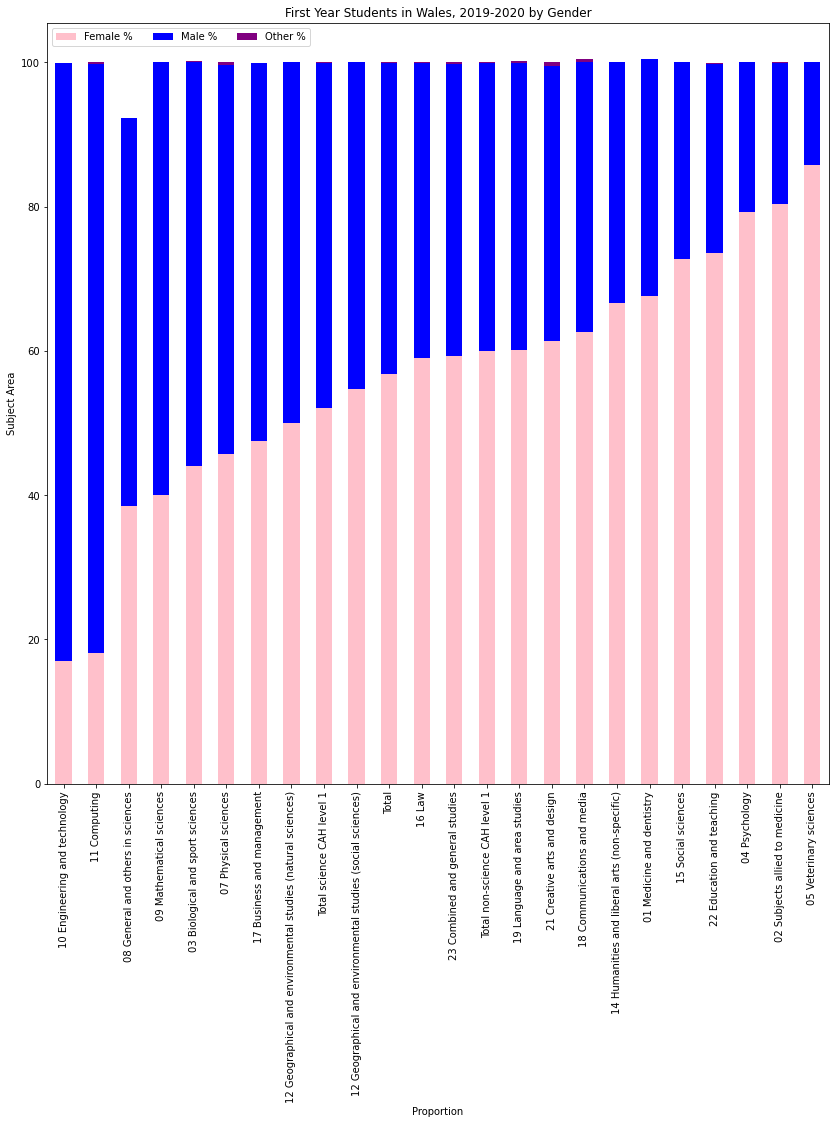

In [70]:
# Plot First Year Percentage of Male, Female, Other 
first_wales.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in Wales, 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()

In [71]:
# Create new df with just first year students for Northen Ireland 
ni = df1[(df1["Year"]=="First year")&(df1["Level"]=="All")
                     &(df1["Mode"]=="All")&(df1["Country"]=="Northern Ireland")]

In [80]:
# Create new df as in the df - there is no numbers for Vet sciences
ni_vet = df1[(df1["Country"]=="Northern Ireland")&(df1["Area"]=="05 Veterinary sciences")]

ni_vet

,Area,Year,Level,Mode,Country,Female,Male,Other,Total,Female %,Male %,Other %
1239,05 Veterinary sciences,All,All,All,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1248,05 Veterinary sciences,All,All,Part-time,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1253,05 Veterinary sciences,All,All postgraduate,All,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1260,05 Veterinary sciences,All,All postgraduate,Part-time,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1308,05 Veterinary sciences,All,Postgraduate (taught),All,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1315,05 Veterinary sciences,All,Postgraduate (taught),Part-time,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1319,05 Veterinary sciences,First year,All,All,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1328,05 Veterinary sciences,First year,All,Part-time,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1332,05 Veterinary sciences,First year,All postgraduate,All,Northern Ireland,0,0,0,5,0.0,0.0,0.0
1339,05 Veterinary sciences,First year,All postgraduate,Part-time,Northern Ireland,0,0,0,5,0.0,0.0,0.0


In [73]:
# Filter df again
subset = ni.iloc[:, [0,9,10,11]]

In [74]:
# Reorder rows
first_ni = subset.sort_values(by='Female %')

In [75]:
# Check new df
first_ni

,Area,Female %,Male %,Other %
1319,05 Veterinary sciences,0.00,0.00,0.0
2474,10 Engineering and technology,22.95,76.64,0.0
2788,11 Computing,25.27,74.73,0.0
2164,09 Mathematical sciences,36.36,63.64,0.0
1572,07 Physical sciences,37.31,62.69,0.0
3411,12 Geographical and environmental studies (soc...,42.86,57.14,0.0
718,03 Biological and sport sciences,45.65,54.35,0.0
1874,08 General and others in sciences,50.00,50.00,0.0
4621,17 Business and management,50.38,49.49,0.0
6175,23 Combined and general studies,58.33,41.67,0.0


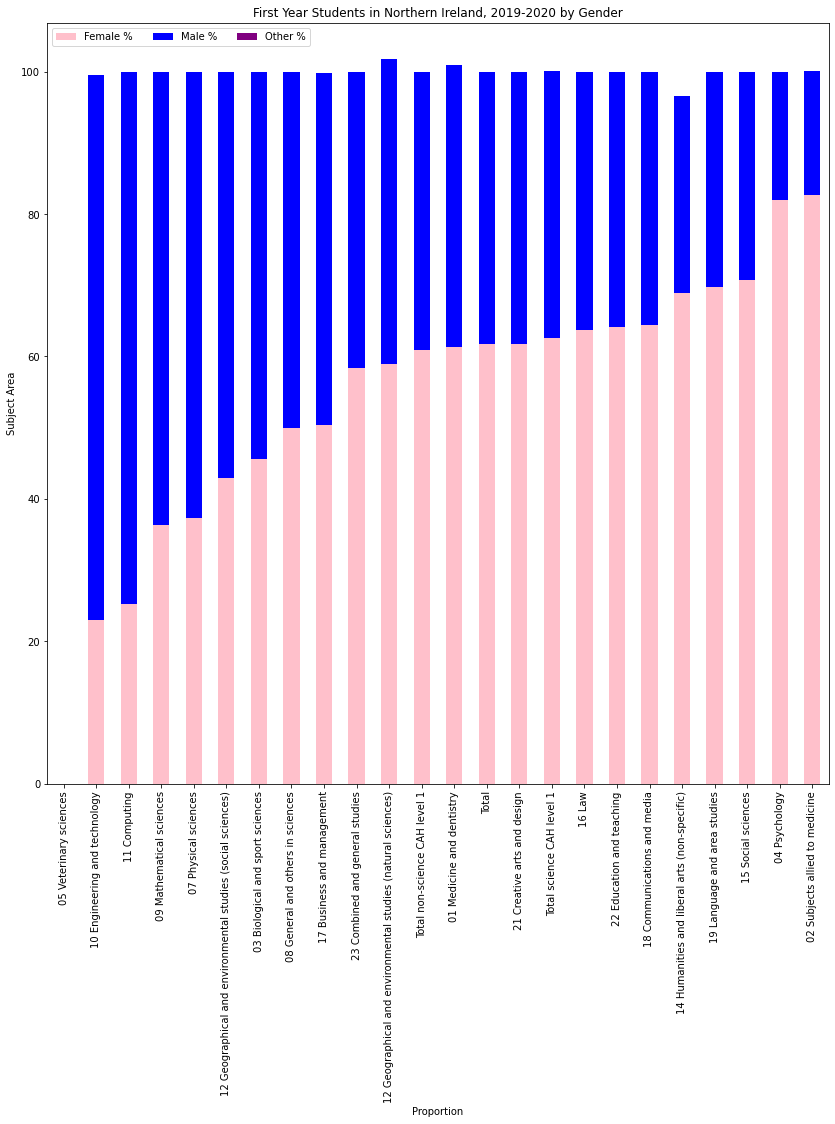

In [76]:
# Plot First Year Percentage of Male, Female, Other 
first_ni.plot(kind='bar', x='Area',
                    stacked=True,  
                    figsize=(14, 14))

plt.legend(loc="upper left", ncol=3)
plt.title("First Year Students in Northern Ireland, 2019-2020 by Gender")
plt.xlabel("Proportion")
plt.ylabel("Subject Area")
plt.show()